# Rule 1 - Web Scraping - Part 3
***

# Recap

Recall from our [Lesson 2](https://github.com/modulusmath/Finance/blob/master/Rule%20%231%20Financial%20Scraping%20-%20Crash%20Course%20-%20Part%20%232.ipynb) we ensured our errors did not hamper the user experience.

Now, as a **Rule #1** investor, we're interested in **Revenue, Net Income, EPS, Free Cash Flow, and ROIC**

In the [script](https://github.com/modulusmath/Finance/blob/master/market_sales.py) you'll see the details, but now that we have some data, we'll calculate the compounded annual growth rate, [cagr](https://feliperego.github.io/blog/2016/08/10/CAGR-Function-In-Python).


# The Big Five Numbers and Growth Rates

Recall our revenue list (after having striped the (bB)(mM)) and cast into floats:

In [47]:
revenue=[49.96, 59.73, 65.83, 73.59, 89.73] 

In Rule #1 fashion we'll need to find a growth rate:

Keep in mind we've previously screen scraped for the years. 

We'll convert the strings later to ints to be able to subtract them as well:

In [54]:
years  = ['2012','2013','2014','2015','2016'] 

We can use [pandas](http://pandas.pydata.org/) to help us. We'll use a [dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html):

In [20]:
import pandas as pd
revincdf = pd.DataFrame( { 'years' : years, 'years_ints': [ int(x) for x in years ], 'data' : revenue } )

In [49]:
revincdf

,data,years,years_strings
0,49.96,2012,2012
1,59.73,2013,2013
2,65.83,2014,2014
3,73.59,2015,2015
4,89.73,2016,2016


In [81]:
num_years=revincdf['years_ints'].max()-revincdf['years_ints']
num_years


0    4
1    3
2    2
3    1
4    0
Name: years_ints, dtype: int64

In [82]:
revenue_growth = ((revincdf['data'].max()/revincdf['data']) ** (1/num_years)-1)
revenue_growth

0    0.157654
1    0.145289
2    0.167500
3    0.219323
4    0.000000
dtype: float64

If we now make the format a bit prettier, we'll be in business:

In [40]:
def prettify_num(num):
    """ Pretty print Growth Rate """
    return '%.2f'%(num*100)+"%"

In [73]:
revenue_growth.apply(prettify_num)

0    15.77%
1    14.53%
2    16.75%
3    21.93%
4     0.00%
dtype: object

In [89]:
stock='goog'
zipped=zip(num_years,years,revenue,revenue_growth_master.apply(prettify_num))
for num,year,rev,gr in zipped:
    print (stock,"had",rev,"Revenue in",year, num, "Year CAGR = ",gr)    

goog had 49.96 Revenue in 2012 4 Year CAGR =  15.77%
goog had 59.73 Revenue in 2013 3 Year CAGR =  14.53%
goog had 65.83 Revenue in 2014 2 Year CAGR =  16.75%
goog had 73.59 Revenue in 2015 1 Year CAGR =  21.93%
goog had 89.73 Revenue in 2016 0 Year CAGR =  0.00%


Voila. 1 year - 4 year **compounded growth rates** for the  stock. 

i.e Each year data point is checked against the **final/last value** (and not the 'next' year).

# Plotting

Once we have all our data for our Big 5 numbers and growth rates, we can plot them, with [bokeh](https://bokeh.pydata.org/en/latest/). 

Here we'll start with a simple line plot.

In [97]:
from bokeh.io import output_file,show
from bokeh.layouts import gridplot
from bokeh.plotting import figure

plot_rev = figure(plot_width=400, plot_height=400,title=stock+" Revenue", x_axis_label='Years',\
            y_axis_label='Revenue')
plot_rev.line(years,revenue,legend="Revenue", line_width=2)
show (plot_rev)           


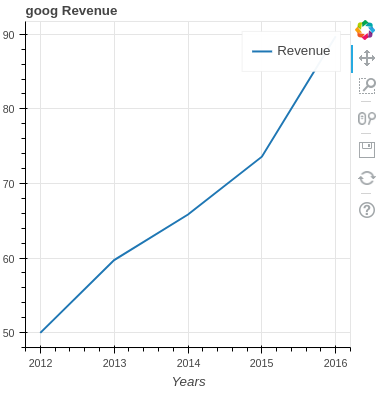

In [104]:
from IPython.display import Image
Image(filename='bk.png')

Nice. Let's plot **all** of our data. But **first** let's show our full script **in action**:

In [107]:
%run ./market_sales.py GOOG

Retrieving HTML for  GOOG
Parsing HTML
Pulling Data out of HTML

GOOG had 49.96 Revenue in 2012  Rate =  15.77%
GOOG had 59.73 Revenue in 2013  Rate =  14.53%
GOOG had 65.83 Revenue in 2014  Rate =  16.75%
GOOG had 73.59 Revenue in 2015  Rate =  21.93%
GOOG had 89.73 Revenue in 2016  Rate =  0.00%

GOOG had 10.74 Net Income in 2012  Rate = 16.05%
GOOG had 12.16 Net Income in 2013  Rate = 17.01%
GOOG had 13.4 Net Income in 2014  Rate = 20.57%
GOOG had 15.83 Net Income in 2015  Rate = 23.06%
GOOG had 19.48 Net Income in 2016  Rate = 0.00%

GOOG had 16.42 EPS in 2012  Rate =  14.60%
GOOG had 18.29 EPS in 2013  Rate =  15.69%
GOOG had 19.82 EPS in 2014  Rate =  19.53%
GOOG had 23.12 EPS in 2015  Rate =  22.49%
GOOG had 28.32 EPS in 2016  Rate =  0.00%

GOOG had 13.35 Free Cash Flow in 2012  Rate = 17.93%
GOOG had 11.3 Free Cash Flow in 2013  Rate = 31.71%
GOOG had 11.42 Free Cash Flow in 2014  Rate = 50.36%
GOOG had 16.11 Free Cash Flow in 2015  Rate = 60.27%
GOOG had 25.82 Free Cash Flow 

As you can see  we've added a **few touches** to the scripts, sharing the **links** and a few **data quality checks...**

Now on to plot the rest of the data:

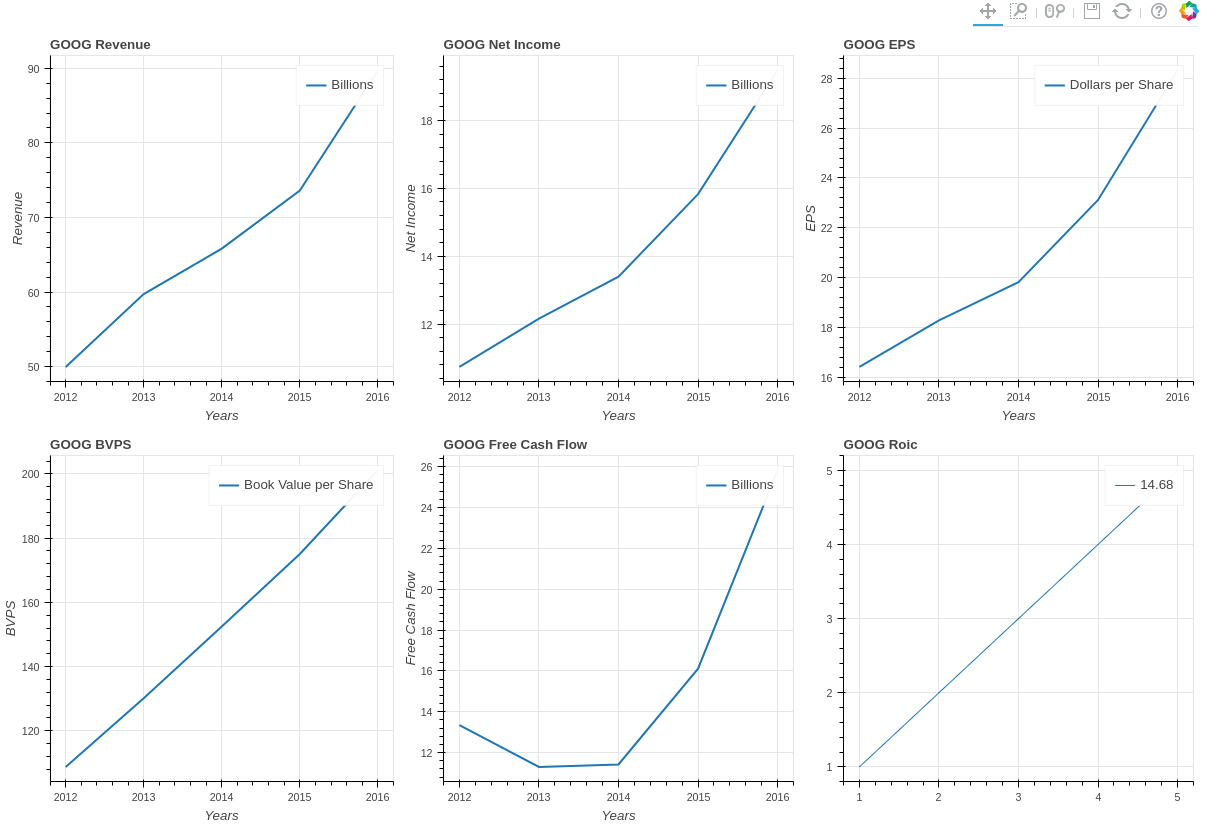

In [110]:
from IPython.display import Image
Image(filename='bk-all.png')

Now we can get a **good, quick visual** of a companies last 5 years of **Big 5 Numbers**. Going up? Great! Going down or sideways? Take another look to **investigate**.

Note that here we put 6 graphs in one page and use a [bokeh grid plot](https://bokeh.pydata.org/en/latest/docs/user_guide/layout.html):

plot = gridplot( [[plot_rev,plot_net_inc,plot_eps],[plot_bvps,plot_fcf,plot_roic]] )
show (plot)

# Spyder

(not specific to web scraping), but ...I'm a big fan of [Spyder](https://github.com/spyder-ide/spyder), modifying the script in one window, running in another, and firing up the plot in the browser. It will save you **lots of development time** with **syntax checking** and helpful **indenting macros**.

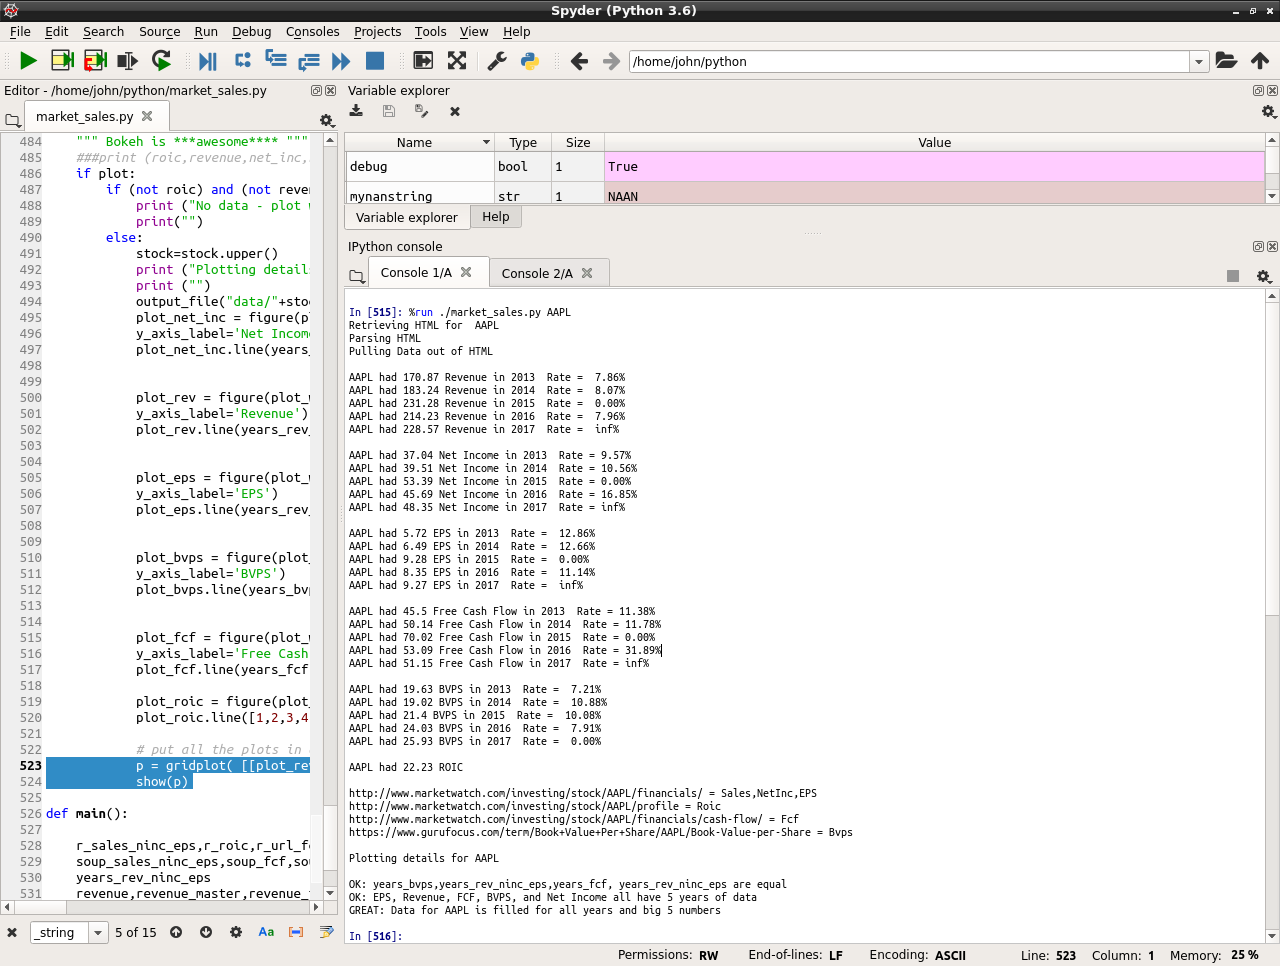

In [116]:
from IPython.display import Image
Image(filename='spyder-rn1.png')

# Wrap Up

We didn't **explicitly show** how to get all the other Big 5 Numbers, those are all in [the main python script](https://github.com/modulusmath/Finance/blob/master/market_sales.py), to be explored. 

Also, you'll notice a few **extra touches/checks** in the script.

Web scraping can be tedious but worth the time. Surely you'll **learn something** if your **tenacious** at it.

In a few weeks we'll integrate with [Django](https://www.djangoproject.com/), but for now you've got a Rule #1 Python stock checking client!